In [95]:
from tools import load
import numpy as np
import matplotlib.pyplot as plt

In [96]:
data = np.array(load(line_splitter=False, to_list=True))
start = np.where(data == "S")[0][0],  np.where(data == "S")[1][0]
end = np.where(data == "E")[0][0],  np.where(data == "E")[1][0]

data[data == "#"] = 0
data[data == "E"] = 1
data[data == "S"] = 1
data[data == "."] = 1

data = data.astype(bool)

In [97]:
def update_if_smaller(c,nc,direction, cost, costs, unvisited, to_visit_next):
    cost = costs[c[0], c[1]] + cost
    if costs[nc[0], nc[1]] > cost:
        costs[nc[0], nc[1]] = cost
        if unvisited[nc[0],nc[1]]:
            to_visit_next.append((cost,nc[0],nc[1], direction))

def calc_costs(c_d, towards): 
        if c_d == towards:
            return 1
        opt1 = (c_d == "E") and (towards == "W")
        opt2 = (c_d == "W") and (towards == "E")
        opt3 = (c_d == "S") and (towards == "N")
        opt4 = (c_d == "N") and (towards == "S")

        if opt1 or opt2 or opt3 or opt4:
            return 2001
        else: 
            return 1001


def cost_update(c,c_d, costs, board, unvisited, to_visit_next):
    if c[0] != 0:
        if board[c[0]-1, c[1]]:
            cost = calc_costs(c_d, "N")
            update_if_smaller(c,(c[0]-1,c[1]),"N",cost, costs, unvisited, to_visit_next)

    if c[0] != (costs.shape[0]-1):
        if board[c[0]+1, c[1]]:
            cost = calc_costs(c_d, "S")
            update_if_smaller(c,(c[0]+1,c[1]),"S",cost, costs, unvisited, to_visit_next)
                
    if c[1] != 0:
        if board[c[0], c[1]-1]:
            cost = calc_costs(c_d, "W")
            update_if_smaller(c,(c[0],c[1]-1),"W",cost, costs, unvisited, to_visit_next)
                
    if c[1] != (costs.shape[0]+1):
        if board[c[0], c[1]+1]:
            cost = calc_costs(c_d, "E")
            update_if_smaller(c,(c[0],c[1]+1),"E",cost, costs, unvisited, to_visit_next)

In [99]:
# Shortest path lets go. 

unvisited = np.ones(data.shape).astype(bool)
costs = np.zeros(data.shape)
costs[:,:] = np.inf
costs[start[0], start[1]] = 0
# have to update the current direction as well with this. better also do the distance. 
current_direction = "E"
to_visit_next = [tuple([0]) +  start + tuple(current_direction)]



while len(to_visit_next):
    to_visit_next.sort()
    current = to_visit_next.pop(0)
    current_position = current[1:3]
    current_direction = current[3]
    cost_update(current_position,current_direction, costs, data, unvisited, to_visit_next)
    
    # proper lowest cost selection as next
    
    unvisited[current_position[0], current_position[1]] = False

In [ ]:
#A
costs[end[0], end[1]]

11048.0

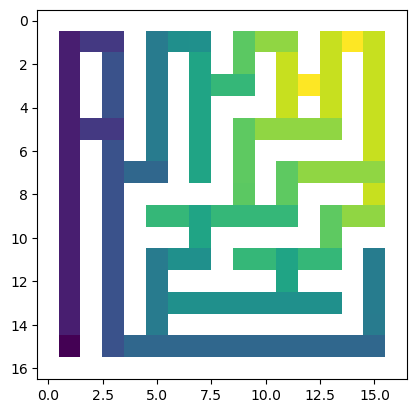

In [ ]:
#B
plt.imshow(costs)

In [144]:
costs[:,-5:]

array([[   inf,    inf,    inf,    inf,    inf],
       [   inf, 11046., 12047., 11048.,    inf],
       [   inf, 11045.,    inf, 11047.,    inf],
       [12035., 11044.,    inf, 11046.,    inf],
       [   inf, 11043.,    inf, 11045.,    inf],
       [10041., 10042.,    inf, 11044.,    inf],
       [   inf,    inf,    inf, 11043.,    inf],
       [10039., 10040., 10041., 10042.,    inf],
       [   inf,    inf,    inf, 11041.,    inf],
       [   inf,  9038., 10039., 10040.,    inf],
       [   inf,  9037.,    inf,    inf,    inf],
       [ 8035.,  8036.,    inf,  5038.,    inf],
       [   inf,    inf,    inf,  5037.,    inf],
       [ 6033.,  6034.,    inf,  5036.,    inf],
       [   inf,    inf,    inf,  5035.,    inf],
       [ 4031.,  4032.,  4033.,  4034.,    inf],
       [   inf,    inf,    inf,    inf,    inf]])

In [ ]:
paths = [([end])]

belongs_to_path = []

while len(paths):

    item = paths.pop(0)
    c = item[-1]
    lowest = []
    if c[0] != 0:
        if data[c[0]-1, c[1]]:
            lowest.append((c[0]-1, c[1],costs[c[0]-1, c[1]]))
           
    if c[0] != (costs.shape[0]-1):
        if data[c[0]+1, c[1]]:
            lowest.append((c[0]+1, c[1],costs[c[0]+1, c[1]]))
    
    if c[1] != 0:
        if data[c[0], c[1]-1]:
            lowest.append((c[0], c[1]-1,costs[c[0], c[1]-1]))

    if c[1] != (costs.shape[0]+1):
        if data[c[0], c[1]+1]:
            lowest.append((c[0], c[1]+1,costs[c[0], c[1]+1]))

    #something is off here. only one remains.
    mini = min([x[2]  for x in lowest])
    print(mini)
    print(lowest)
    potential_paths = [y for y in lowest if y[2] == mini]
    print(potential_paths)
    for p in potential_paths:
        print(p)
        if p[:2] not in belongs_to_path:
            belongs_to_path.append(p[:2])
            paths.append(item + [p[:2]])

[(2, 15, 11047.0), (1, 14, 12047.0)]
11047.0
[(2, 15, 11047.0)]
(2, 15, 11047.0)
[(1, 15, 11048.0), (3, 15, 11046.0)]
11046.0
[(3, 15, 11046.0)]
(3, 15, 11046.0)
[(2, 15, 11047.0), (4, 15, 11045.0)]
11045.0
[(4, 15, 11045.0)]
(4, 15, 11045.0)
[(3, 15, 11046.0), (5, 15, 11044.0)]
11044.0
[(5, 15, 11044.0)]
(5, 15, 11044.0)
[(4, 15, 11045.0), (6, 15, 11043.0)]
11043.0
[(6, 15, 11043.0)]
(6, 15, 11043.0)
[(5, 15, 11044.0), (7, 15, 10042.0)]
10042.0
[(7, 15, 10042.0)]
(7, 15, 10042.0)
[(6, 15, 11043.0), (8, 15, 11041.0), (7, 14, 10041.0)]
10041.0
[(7, 14, 10041.0)]
(7, 14, 10041.0)
[(7, 13, 10040.0), (7, 15, 10042.0)]
10040.0
[(7, 13, 10040.0)]
(7, 13, 10040.0)
[(7, 12, 10039.0), (7, 14, 10041.0)]
10039.0
[(7, 12, 10039.0)]
(7, 12, 10039.0)
[(7, 11, 9038.0), (7, 13, 10040.0)]
9038.0
[(7, 11, 9038.0)]
(7, 11, 9038.0)
[(8, 11, 9037.0), (7, 12, 10039.0)]
9037.0
[(8, 11, 9037.0)]
(8, 11, 9037.0)
[(7, 11, 9038.0), (9, 11, 8036.0)]
8036.0
[(9, 11, 8036.0)]
(9, 11, 8036.0)
[(8, 11, 9037.0), (9, 1

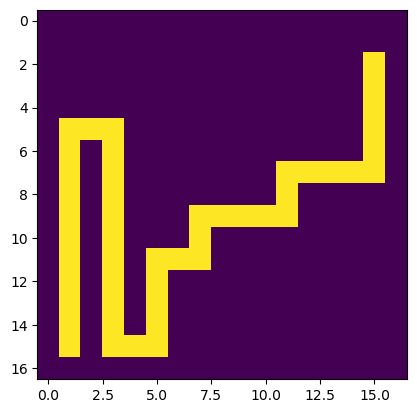

In [143]:
visu =np.zeros(data.shape)
for x in belongs_to_path:
    visu[x] = 1
plt.imshow(visu)

In [131]:
belongs_to_path

[(2, 15), (3, 15), (4, 15), (5, 15), (6, 15), (7, 15), (7, 4), (7, 5), (6, 5)]

In [123]:
[p[:2]]

[(2, 15)]

In [118]:
item

(2, 15, 11047.0)

In [51]:
to_visit_next

[]

In [147]:
cost_update(current_position, current_direction, costs, data)

unvisited[current_position[0], current_position[1]] = False

current_position = np.where(costs == costs[unvisited].min())
current_position = current_position[0][0],  current_position[1][0]

(13, 1) (12, 1)
(13, 1) (13, 2)


In [148]:
current_position

(13, 2)

In [140]:
(costs * unvisited)

array([[      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf

In [135]:
costs[np.]

array([[      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf

In [130]:
costs

array([[      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf

In [128]:
np.where((costs * visited) == np.nanmin(costs * visited))

<ipython-input-128-b0df09843ac9>:1: RuntimeWarning: invalid value encountered in multiply
  np.where((costs * visited) == np.nanmin(costs * visited))


(array([12, 13, 13]), array([1, 1, 2]))

In [126]:
current_position

(12, 1)

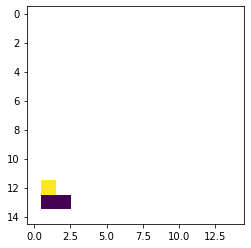

In [123]:
plt.imshow(costs)

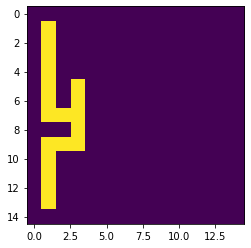

In [99]:
plt.imshow(visited)

In [15]:

data[data == "#"] = False
data[data == "S"] = True
data[data == "."] = True

array([['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
        '-', '-'],
       ['-', 'i', 'i', 'i', 'i', 'i', 'i', 'i', '-', 'i', 'i', 'i', 'i',
        'E', '-'],
       ['-', 'i', '-', 'i', '-', '-', '-', 'i', '-', 'i', '-', '-', '-',
        'i', '-'],
       ['-', 'i', 'i', 'i', 'i', 'i', '-', 'i', '-', 'i', 'i', 'i', '-',
        'i', '-'],
       ['-', 'i', '-', '-', '-', 'i', '-', '-', '-', '-', '-', 'i', '-',
        'i', '-'],
       ['-', 'i', '-', 'i', '-', 'i', 'i', 'i', 'i', 'i', 'i', 'i', '-',
        'i', '-'],
       ['-', 'i', '-', 'i', '-', '-', '-', '-', '-', 'i', '-', '-', '-',
        'i', '-'],
       ['-', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', '-',
        'i', '-'],
       ['-', '-', '-', 'i', '-', 'i', '-', '-', '-', '-', '-', 'i', '-',
        'i', '-'],
       ['-', 'i', 'i', 'i', '-', 'i', 'i', 'i', 'i', 'i', '-', 'i', '-',
        'i', '-'],
       ['-', 'i', '-', 'i', '-', 'i', '-', '-', '-', 'i', '-', 'i', '-',
       